In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [11]:
data = loadmat('E:\Mat_Work\machine-learning-ex7\machine-learning-ex7\ex7\ex7data2.mat')
X = data['X']

In [28]:
def findClosestCentroids(X,centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            dist = np.sum((X[i,:] - centroids[j,:])**2)
            temp[j] = dist
        idx[i] = np.argmin(temp)+1
    return idx

In [39]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = initial_centroids.shape[0]
idx = findClosestCentroids(X,initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


In [40]:
def computeCentroids(X,idx,K):
    (m,n) = X.shape
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int(idx[i]-1)
        centroids[index,:] += X[i,:]
        count[index] +=1
    return centroids/count

In [41]:
centroids = computeCentroids(X,idx,K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


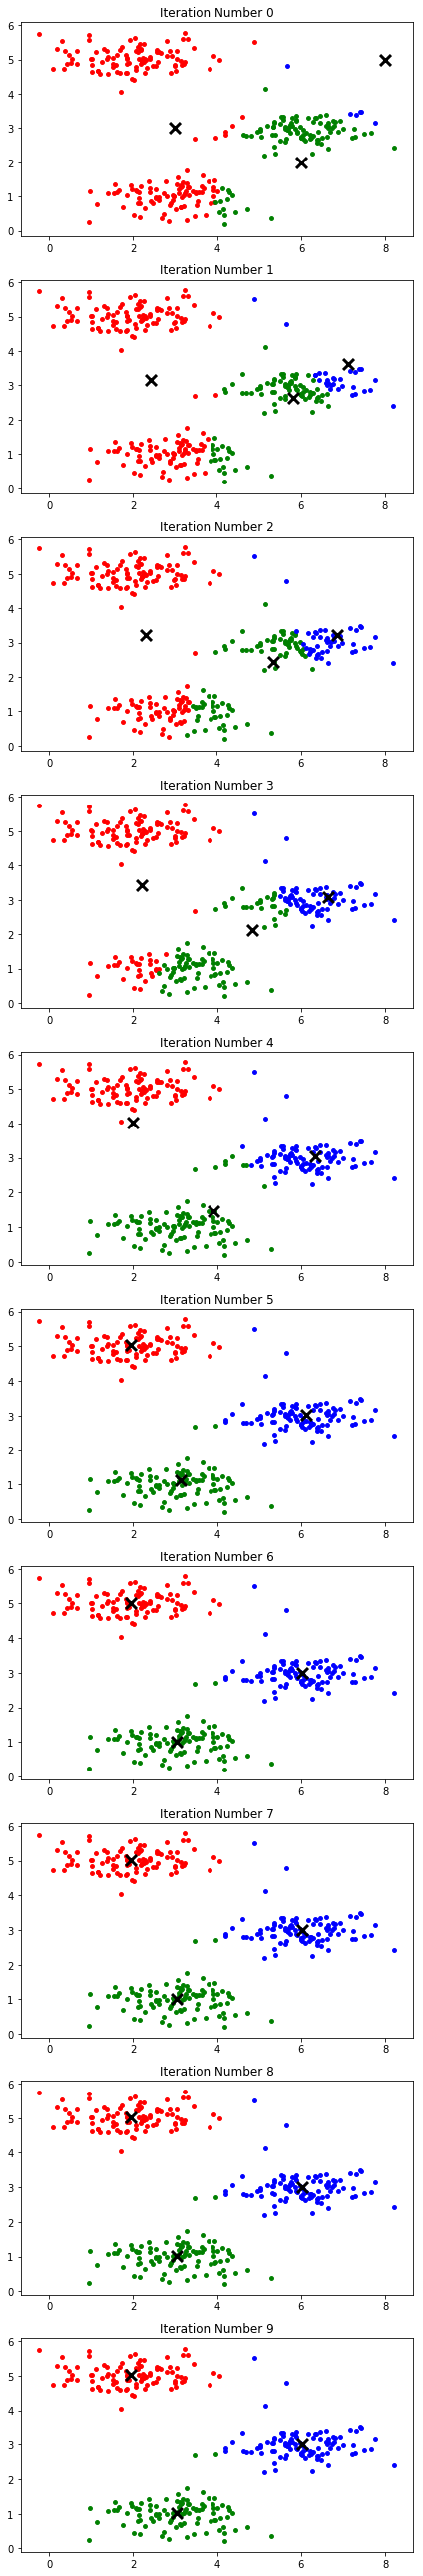

In [46]:
def plotKmeans(X,centroids,idx,K,num_iters):
    (m,n) = X.shape
    fig,ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    for i in range(num_iters):
        color = 'rgb'
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker='x',c='black',linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()
m,n = X.shape[0],X.shape[1]
plotKmeans(X, initial_centroids,idx, K,10)

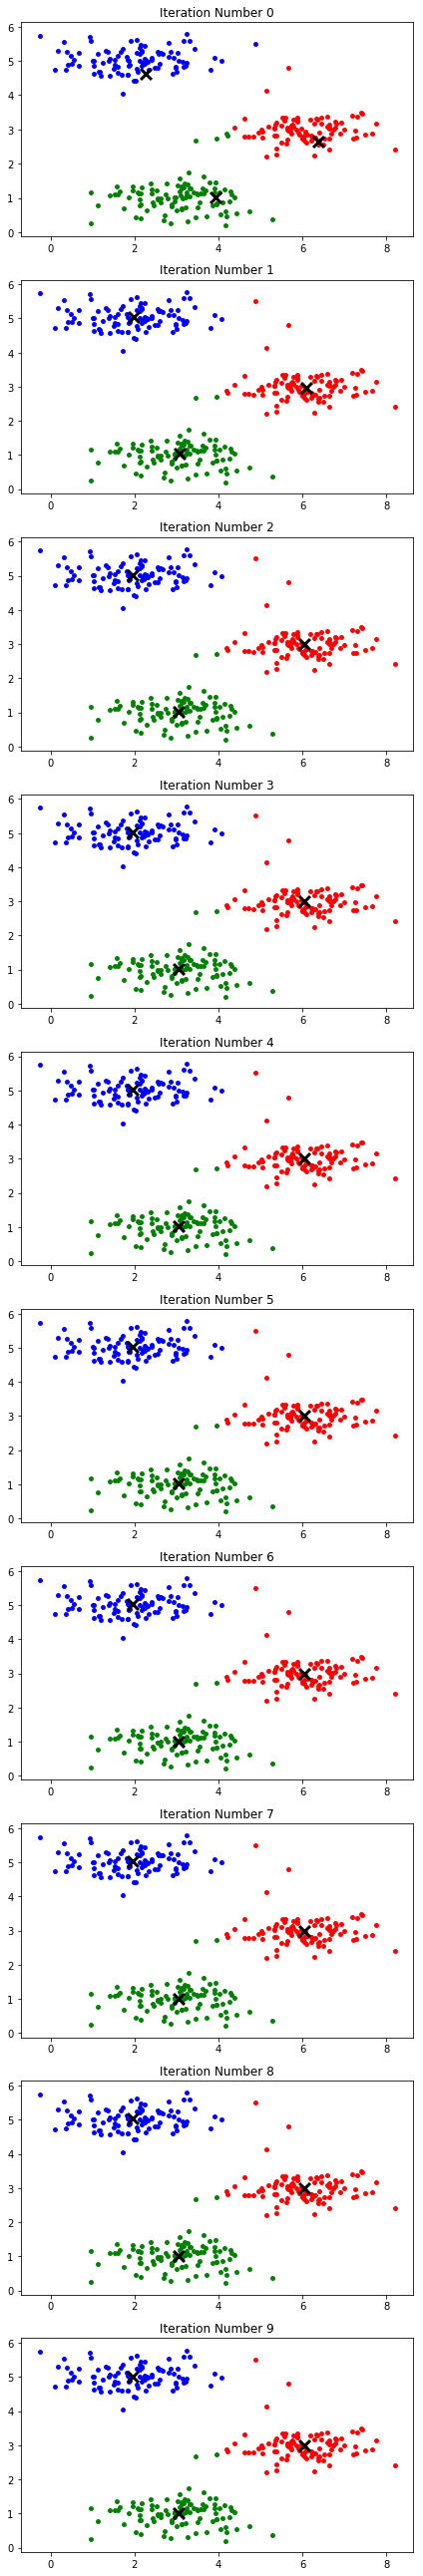

In [51]:
def kMeansInitCentroids(X, K):
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
    return centroids
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids,idx, K,10)

In [62]:
# compressing an image using K-means
data2 = loadmat('E:\Mat_Work\machine-learning-ex7\machine-learning-ex7\ex7\ex7data4.mat')
A = data2['A']

X2 = (A/255).reshape(128*128,3)

def runKmeans(X,initial_centroids,num_iters,K):
    idx = findClosestCentroids(X,initial_centroids)
    for i in range(num_iters):
        centroids = computeCentroids(X,idx,K)
        idx = findClosestCentroids(X,centroids)
    return centroids,idx

In [73]:
K2 = 16
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)
centroids2, idx2 = runKmeans(X2, initial_centroids2, num_iters,K2)

(m2,n2) = X2.shape
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]
X2_recovered = X2_recovered.reshape(128,128,3)

import matplotlib.image as mpimg
fig,ax = plt.subplot(2,1)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)


ValueError: Illegal argument(s) to subplot: (2, 1)

<Figure size 432x288 with 0 Axes>

(4, 1)
(4, 1)
